# Numerical Methods - Assignment 1

## 1. Python and MATLAB
List at least 3 differences between Python and MATLAB.

1. Python is free and open source, which provides extensive libraries and community for the programming language. 
   On the other hand, Matlab requires lisence and is a closed source software.
   
2. Python has a wide variety of usage, including web programming, data visualization, and machine learning.
   Whereas, Matlab focus mainly on mathematical calcualtions, such as matrix and plotting.
   
3. Python isn't known for generating comprehensive and automatic codes for embedded systems.
   Matlab code generates readable, portable c and c++ code.

## 2. Plot Data
**Read the data and create a plot.**
- Import `matplotlib` and `pandas` packages.
- Read in `data/ethanol_IR.csv` file and create a plot of IR spectra data.

In [14]:
import pylab as plt
import pandas as pd

# Avoiding the program to shut down by error if file couldn't be found
try:
    fdata = pd.read_csv('data/ethanol_IR.csv')
    X = fdata.values
except:
    print("Could not find the file")


Text(0, 0.5, 'Absorbance [unitless]')

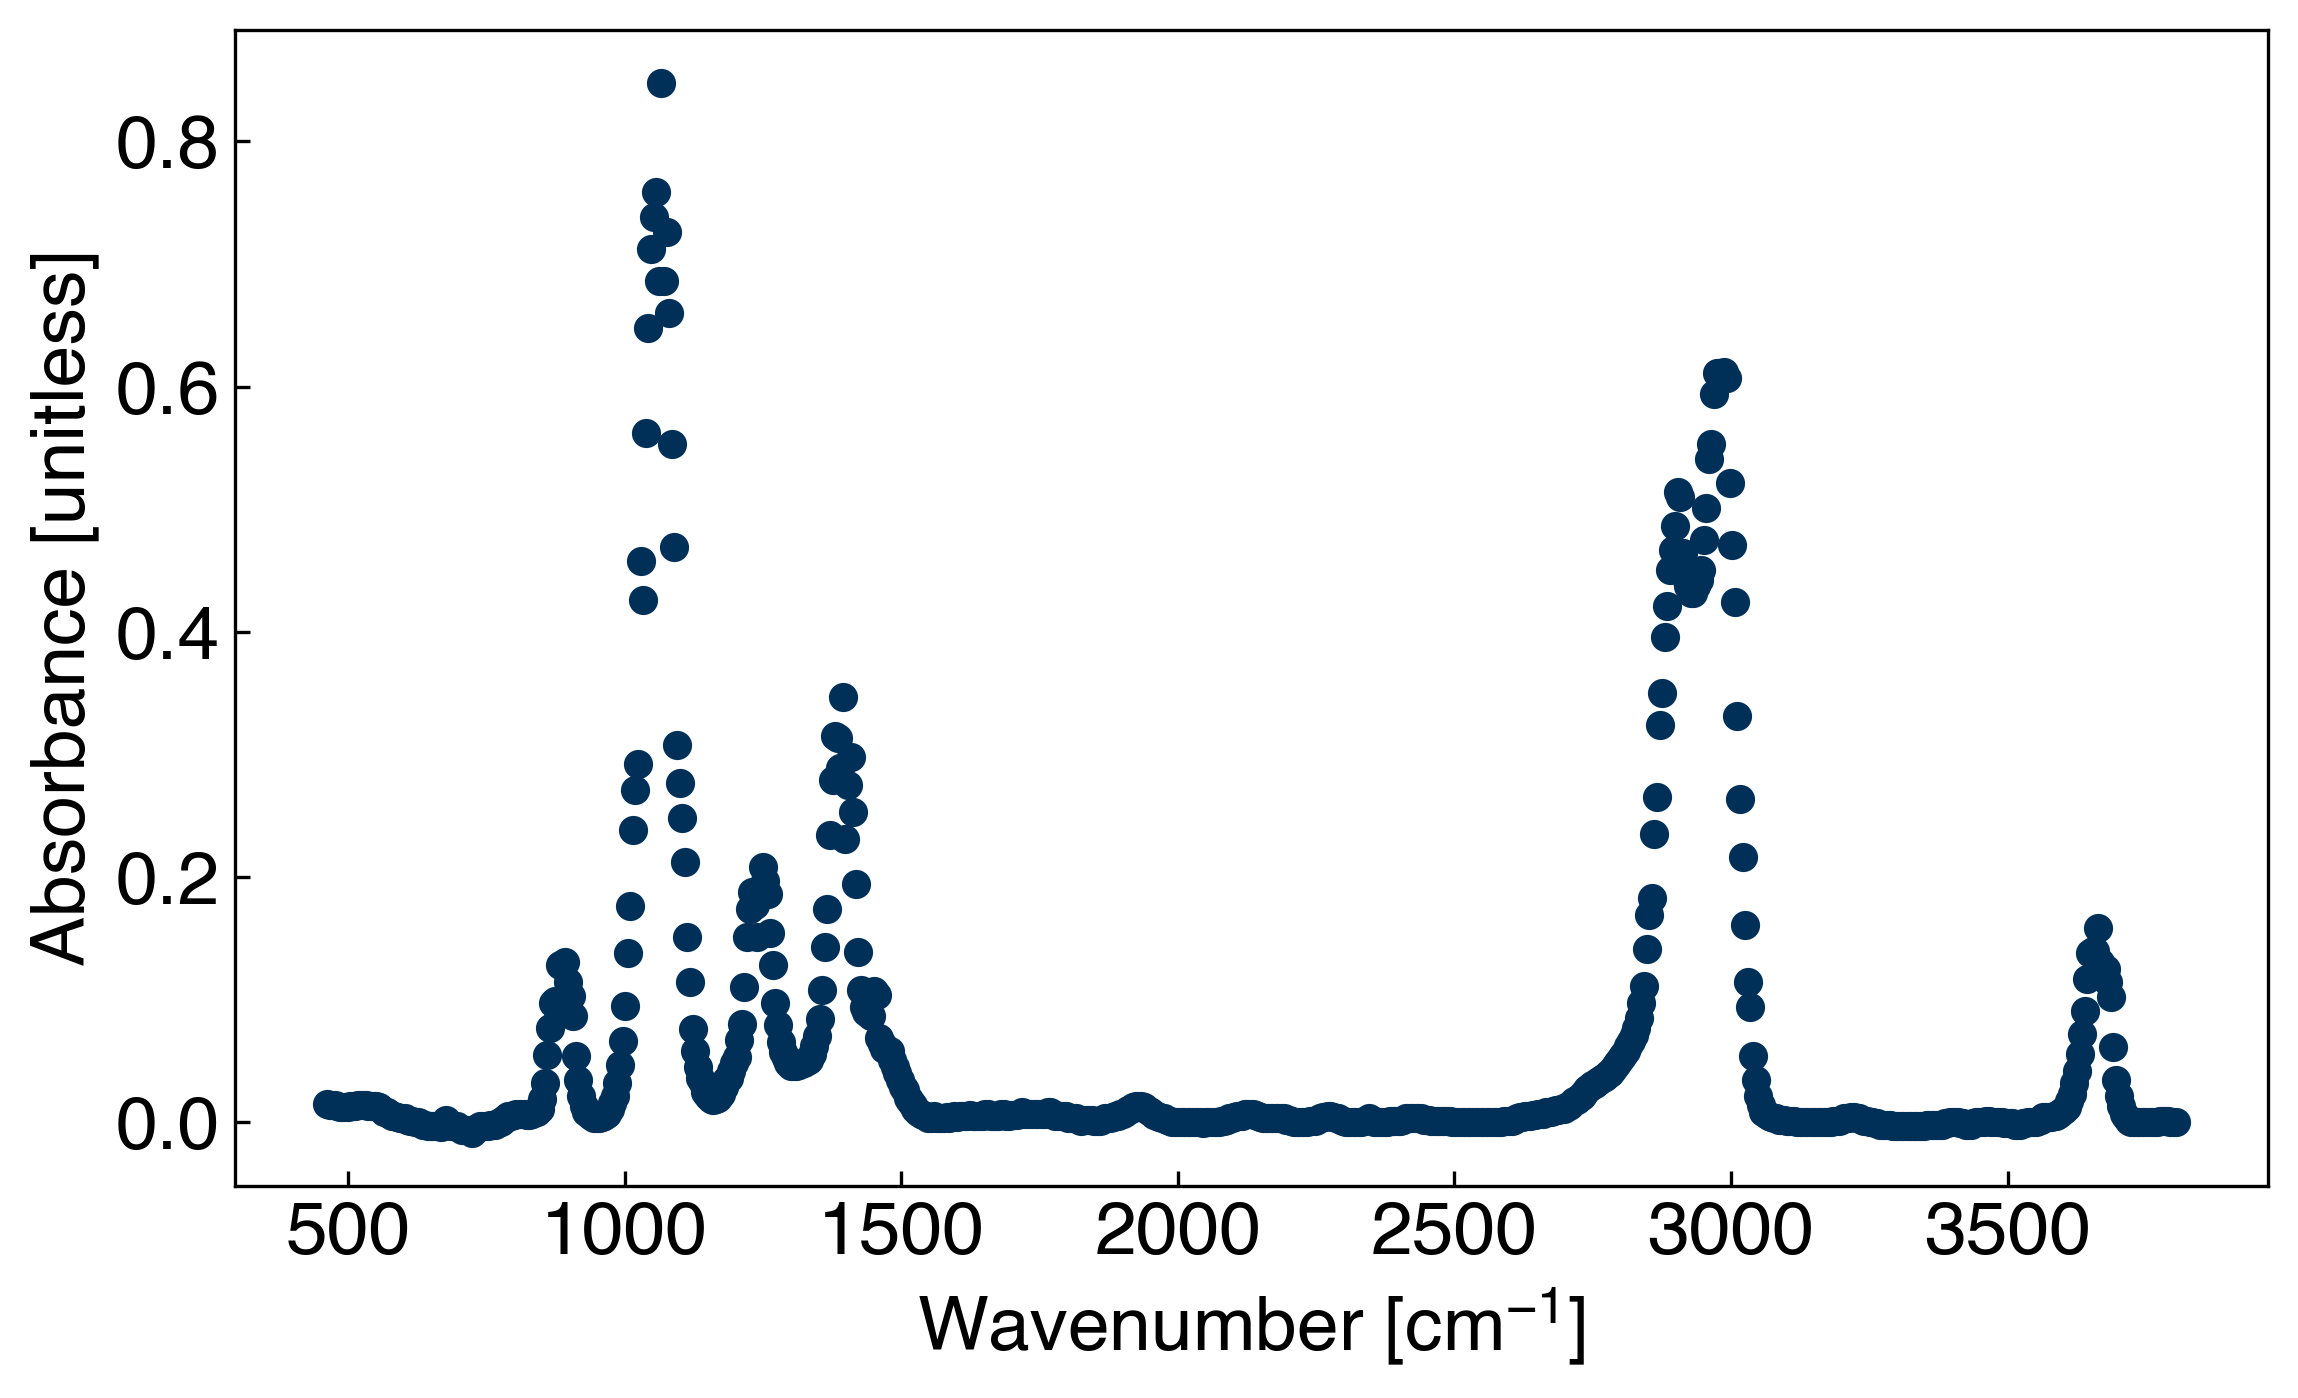

In [15]:
%matplotlib inline
import pylab as plt

plt.style.use('data/settings/plot_style.mplstyle')
x = X[:,0]
y = X[:,1]

fig, ax = plt.subplots(figsize=(8, 5)) #create a new figure object (fig) with an associated axis object (ax)
ax.plot(x,y,marker='o', ls='none')
ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('Absorbance [unitless]')

**Briefly describe the most prominent peaks in the dataset.**

As shown in the diagram, the most prominent peak is located between wavenumber 1000 and 1200.

## 3. Matrix-vector Multiplication
**Write a funcion that uses `for` loops.**

This function should multiply an arbitrary matrix and vector.

In [6]:
def mulMatVec(matrix, vector):
    #Test Case
    """
    >>> mulMatVec([[1,1],[1,1]], [1,1])
    [2,2]
    """
    
    # Write code here
    # The name of result variable should be result
    result = []
    
    for row in matrix:
        sum = 0
        for i in range(len(row)):
            sum += row[i] * vector[i]
        result.append(sum)
    
    return np.array(result)

You can use the matrix and vector given below.

In [7]:
import numpy as np

A = np.array([[1, 2], [-4, 5]])
B = np.array([-2, 3])

C = np.array([[ 5, 1 ,3], [ 1, 1 ,1], [ 1, 2 ,1]])
D = np.array([1, 2, 3])

print(f"mulMatVec(A,B) = {mulMatVec(A, B)}")
print(f"A.dot(B) = {A.dot(B)}")
print(f"mulMatVec(C,D) = {mulMatVec(C, D)}")
print(f"C.dot(D) = {C.dot(D)}")

mulMatVec([[1,1],[1,1]], [1,1])

mulMatVec(A,B) = [ 4 23]
A.dot(B) = [ 4 23]
mulMatVec(C,D) = [16  6  8]
C.dot(D) = [16  6  8]


array([2, 2])

Or create an arbitrary set of matrix and vector using `numpy.random.rand`.

In [8]:
from numpy.random import rand

X = rand(2, 2)
Y = rand(2, 1)

print(f"""X: {X}\nY: {Y}\n\nmulMaxVec(X,Y): {mulMatVec(X, Y)}\nX.dot(Y): {X.dot(Y)}""")

# You can create your own inputs

X: [[0.06577943 0.23697082]
 [0.08594647 0.33938471]]
Y: [[0.37243298]
 [0.00084473]]

mulMaxVec(X,Y): [[0.02469861]
 [0.03229599]]
X.dot(Y): [[0.02469861]
 [0.03229599]]


**Show that your function is correct using `numpy.isclose`.**

In [9]:
print(np.isclose(mulMatVec(A,B), A.dot(B)))
print(np.isclose(mulMatVec(C,D), C.dot(D)))
print(np.isclose(mulMatVec(X,Y), X.dot(Y)))

[ True  True]
[ True  True  True]
[[ True]
 [ True]]


## 4. Vandermonde Matrix
**Use `numpy.hstack` to construct a 4th-order Vandermonde matrix.**

Range should be from -1 to 1 with a resolution of 25 (i.e. the number of rows should be 25).

In [10]:
import numpy as np
resolution = 25

xi = np.linspace(-1,1,resolution)
xi = xi.reshape(-1,1)

xi_vdm = np.hstack((xi**0, xi**1, xi**2, xi**3, xi**4))
print(xi_vdm.shape)

(25, 5)


**Create an orthonormal version of the Vandermonde matrix.**

Orthonormal means:
- the $L_2$ norm of each column is 1.
- the inner product between any 2 columns is 0.

Print the orthonormalized Vandermonde matrix.

In [107]:
x = np.linspace(-1,1,25)
x = x.reshape(-1,1)

In [129]:
vdm = np.hstack((x**0, x**1, x**2, x**3, x**4))

In [145]:
"""
proju(v) = <v, u>/<u, u> * u
u1 = v1
u2 = v2 - proju1(v2)
u3 = v3 - proju1(v3) - proju2(v3)
u4 = v4 - proju1(v4) - proju2(v4) - proju3(v4)
u5 = v5 - proju1(v5) - proju2(v5) - proju3(v5) - proju4(v5)
"""

col_1_ortho = vdm[:,0] / np.linalg.norm(vdm[:,0], 2)

col_2_ortho = vdm[:,1] - np.dot(vdm[:,1], col_1_ortho)*col_1_ortho
col_2_ortho = col_2_ortho / np.linalg.norm(col_2_ortho, 2)

col_3_ortho = vdm[:,2] - np.dot(vdm[:,2], col_1_ortho)*col_1_ortho - np.dot(vdm[:,2], col_2_ortho)*col_2_ortho
col_3_ortho = col_3_ortho / np.linalg.norm(col_3_ortho, 2)

col_4_ortho = (vdm[:,3] - np.dot(vdm[:,3], col_1_ortho)*col_1_ortho - np.dot(vdm[:,3], col_2_ortho)*col_2_ortho 
              - np.dot(vdm[:,3], col_3_ortho)*col_3_ortho)
col_4_ortho = col_4_ortho / np.linalg.norm(col_4_ortho, 2)

col_5_ortho = (vdm[:,4] - np.dot(vdm[:,4], col_1_ortho)*col_1_ortho - np.dot(vdm[:,4], col_2_ortho)*col_2_ortho
              - np.dot(vdm[:,4], col_3_ortho)*col_3_ortho - np.dot(vdm[:,4], col_4_ortho)*col_4_ortho)
col_5_ortho = col_5_ortho / np.linalg.norm(col_5_ortho, 2)

In [149]:
col_1_ortho = col_1_ortho.reshape(-1,1)
col_2_ortho = col_2_ortho.reshape(-1,1)
col_3_ortho = col_3_ortho.reshape(-1,1)
col_4_ortho = col_4_ortho.reshape(-1,1)
col_5_ortho = col_5_ortho.reshape(-1,1)

vdm_ortho = np.hstack((col_1_ortho, col_2_ortho, col_3_ortho, col_4_ortho, col_5_ortho))

**Show that the $L_2$ of 5th column is 1.**

In [150]:
norm_col_5 = np.linalg.norm(col_5_ortho, 2)
np.isclose(norm_col_5, 1)

True

**Show that the inner product between 1st column & 4th column is 0.**

In [159]:
col_1_dot_col_4 = np.dot(vdm_ortho[:,0], vdm_ortho[:,3])
np.isclose(col_1_dot_col_4, 0)

True

**Compute the rank of the orthonormalized Vandermonde matrix.**

In [160]:
vdm_rank = np.linalg.matrix_rank(vdm_ortho)
vdm_rank

5

**Show that the rank is equal to the number of columns.**

In [161]:
num_col = vdm_ortho.shape[1]
np.isclose(num_col, vdm_rank)

True

**Change the resolution to 30 and show that the rank is independent of the number of rows.**

In [172]:
x_30 = np.linspace(-1,1,30)
x_30 = x_30.reshape(-1,1)
vdm_30 = np.hstack((x_30**0, x_30**1, x_30**2, x_30**3, x_30**4))

In [169]:
col_1_ortho = vdm_30[:,0] / np.linalg.norm(vdm_30[:,0], 2)

col_2_ortho = vdm_30[:,1] - np.dot(vdm_30[:,1], col_1_ortho)*col_1_ortho
col_2_ortho = col_2_ortho / np.linalg.norm(col_2_ortho, 2)

col_3_ortho = (vdm_30[:,2] - np.dot(vdm_30[:,2], col_1_ortho)*col_1_ortho
               - np.dot(vdm_30[:,2], col_2_ortho)*col_2_ortho)
col_3_ortho = col_3_ortho / np.linalg.norm(col_3_ortho, 2)

col_4_ortho = (vdm_30[:,3] - np.dot(vdm_30[:,3], col_1_ortho)*col_1_ortho
               - np.dot(vdm_30[:,3], col_2_ortho)*col_2_ortho - np.dot(vdm_30[:,3], col_3_ortho)*col_3_ortho)
col_4_ortho = col_4_ortho / np.linalg.norm(col_4_ortho, 2)

col_5_ortho = (vdm_30[:,4] - np.dot(vdm_30[:,4], col_1_ortho)*col_1_ortho
               - np.dot(vdm_30[:,4], col_2_ortho)*col_2_ortho - np.dot(vdm_30[:,4], col_3_ortho)*col_3_ortho
               - np.dot(vdm_30[:,4], col_4_ortho)*col_4_ortho)
col_5_ortho = col_5_ortho / np.linalg.norm(col_5_ortho, 2)

In [170]:
col_1_ortho = col_1_ortho.reshape(-1,1)
col_2_ortho = col_2_ortho.reshape(-1,1)
col_3_ortho = col_3_ortho.reshape(-1,1)
col_4_ortho = col_4_ortho.reshape(-1,1)
col_5_ortho = col_5_ortho.reshape(-1,1)

vdm_30_ortho = np.hstack((col_1_ortho, col_2_ortho, col_3_ortho, col_4_ortho, col_5_ortho))

In [171]:
rank_30 = np.linalg.matrix_rank(vdm_30_ortho)
np.isclose(vdm_rank, rank_30)

True